# Ensambles

A lo largo del notebook vamos a trabajar con el siguiente dataset:

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

El objetivo de este analisis será predecir si lloverá o no al día siguiente.

## 1. EDA y Preprocesamiento

In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve



1. Abrir el dataset

In [74]:
data = pd.read_csv("../datasets/DS_Encuentro_27_Weather.csv")
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

Contamos cuántos valores no-nulos hay

In [75]:
data.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

2. Tirar las columnas que no nos interesan, entre ellas las que tienen pocos datos (menos de cien mil). Además, tirar 'Location' y 'Date', ya que no nos interesa el lugar ni fecha (al menos en este análisis), y 'RISK_MM', porque es un *leak*. **Para googlear**: ¿qué es un leak?

In [76]:
columnas_descartables = ['Location', 'Date', 'RISK_MM']
data = data.drop(columns=columnas_descartables)
data.shape
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     13.4     22.9       0.6          NaN       NaN           W   
1      7.4     25.1       0.0          NaN       NaN         WNW   
2     12.9     25.7       0.0          NaN       NaN         WSW   
3      9.2     28.0       0.0          NaN       NaN          NE   
4     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          W        WNW          20.0  ...         71.0   
1           44.0        NNW        WSW           4.0  ...         44.0   
2           46.0          W        WSW          19.0  ...         38.0   
3           24.0         SE          E          11.0  ...         45.0   
4           41.0        ENE         NW           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   
2         30.0       1007.6       1008.7       NaN       2.0     21.0   
3         16.0       1017.6       1012.8       NaN       NaN     18.1   
4         33.0       1010.8       1006.0       7.0       8.0     17.8   

   Temp3pm  RainToday RainTomorrow  
0     21.8         No           No  
1     24.3         No           No  
2     23.2         No           No  
3     26.5         No           No  
4     29.7         No           No  

[5 rows x 21 columns]

3. Tirar todas las filas que tengan valores nulos.

In [77]:
data = data.dropna()
print(data.shape)
data.head()

(56420, 21)


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
5939     17.9     35.2       0.0         12.0      12.3         SSW   
5940     18.4     28.9       0.0         14.8      13.0           S   
5942     19.4     37.6       0.0         10.8      10.6         NNE   
5943     21.9     38.4       0.0         11.4      12.2         WNW   
5944     24.2     41.0       0.0         11.2       8.4         WNW   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
5939           48.0        ENE         SW           6.0  ...         20.0   
5940           37.0        SSE        SSE          19.0  ...         30.0   
5942           46.0        NNE        NNW          30.0  ...         42.0   
5943           31.0        WNW        WSW           6.0  ...         37.0   
5944           35.0         NW        WNW          17.0  ...         19.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
5939         13.0       1006.3       1004.4       2.0       5.0     26.6   
5940          8.0       1012.9       1012.1       1.0       1.0     20.3   
5942         22.0       1012.3       1009.2       1.0       6.0     28.7   
5943         22.0       1012.7       1009.1       1.0       5.0     29.1   
5944         15.0       1010.7       1007.4       1.0       6.0     33.6   

      Temp3pm  RainToday RainTomorrow  
5939     33.4         No           No  
5940     27.0         No           No  
5942     34.9         No           No  
5943     35.6         No           No  
5944     37.6         No           No  

[5 rows x 21 columns]

4. Para simplificar el preprocesamiento, también tirar todas las columnas que tengan valores categóricos. ¿Por qué no nos molesta tirar 'RainToday'?

In [78]:
columnas_descartables = ['RainToday']
data = data.drop(columns=columnas_descartables)
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
5939     17.9     35.2       0.0         12.0      12.3         SSW   
5940     18.4     28.9       0.0         14.8      13.0           S   
5942     19.4     37.6       0.0         10.8      10.6         NNE   
5943     21.9     38.4       0.0         11.4      12.2         WNW   
5944     24.2     41.0       0.0         11.2       8.4         WNW   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
5939           48.0        ENE         SW           6.0          20.0   
5940           37.0        SSE        SSE          19.0          19.0   
5942           46.0        NNE        NNW          30.0          15.0   
5943           31.0        WNW        WSW           6.0           6.0   
5944           35.0         NW        WNW          17.0          13.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
5939         20.0         13.0       1006.3       1004.4       2.0       5.0   
5940         30.0          8.0       1012.9       1012.1       1.0       1.0   
5942         42.0         22.0       1012.3       1009.2       1.0       6.0   
5943         37.0         22.0       1012.7       1009.1       1.0       5.0   
5944         19.0         15.0       1010.7       1007.4       1.0       6.0   

      Temp9am  Temp3pm RainTomorrow  
5939     26.6     33.4           No  
5940     20.3     27.0           No  
5942     28.7     34.9           No  
5943     29.1     35.6           No  
5944     33.6     37.6           No

5. Realizar un countplot para ver cuántos casos hay de lluvia y no-lluvia.

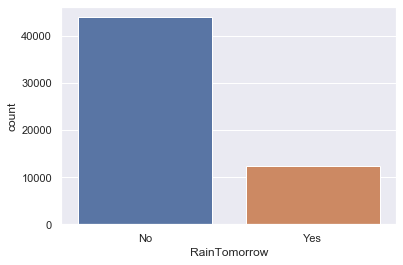

In [79]:
sns.countplot(data=data, x='RainTomorrow')
plt.show()

Y hacer el `pairplot` para ver cómo se relacionan las variables. Recuerden que este gráfico puede llevar bastante tiempo. También recuerden que pueden agrandar el gráfico haciendo doble click en él.

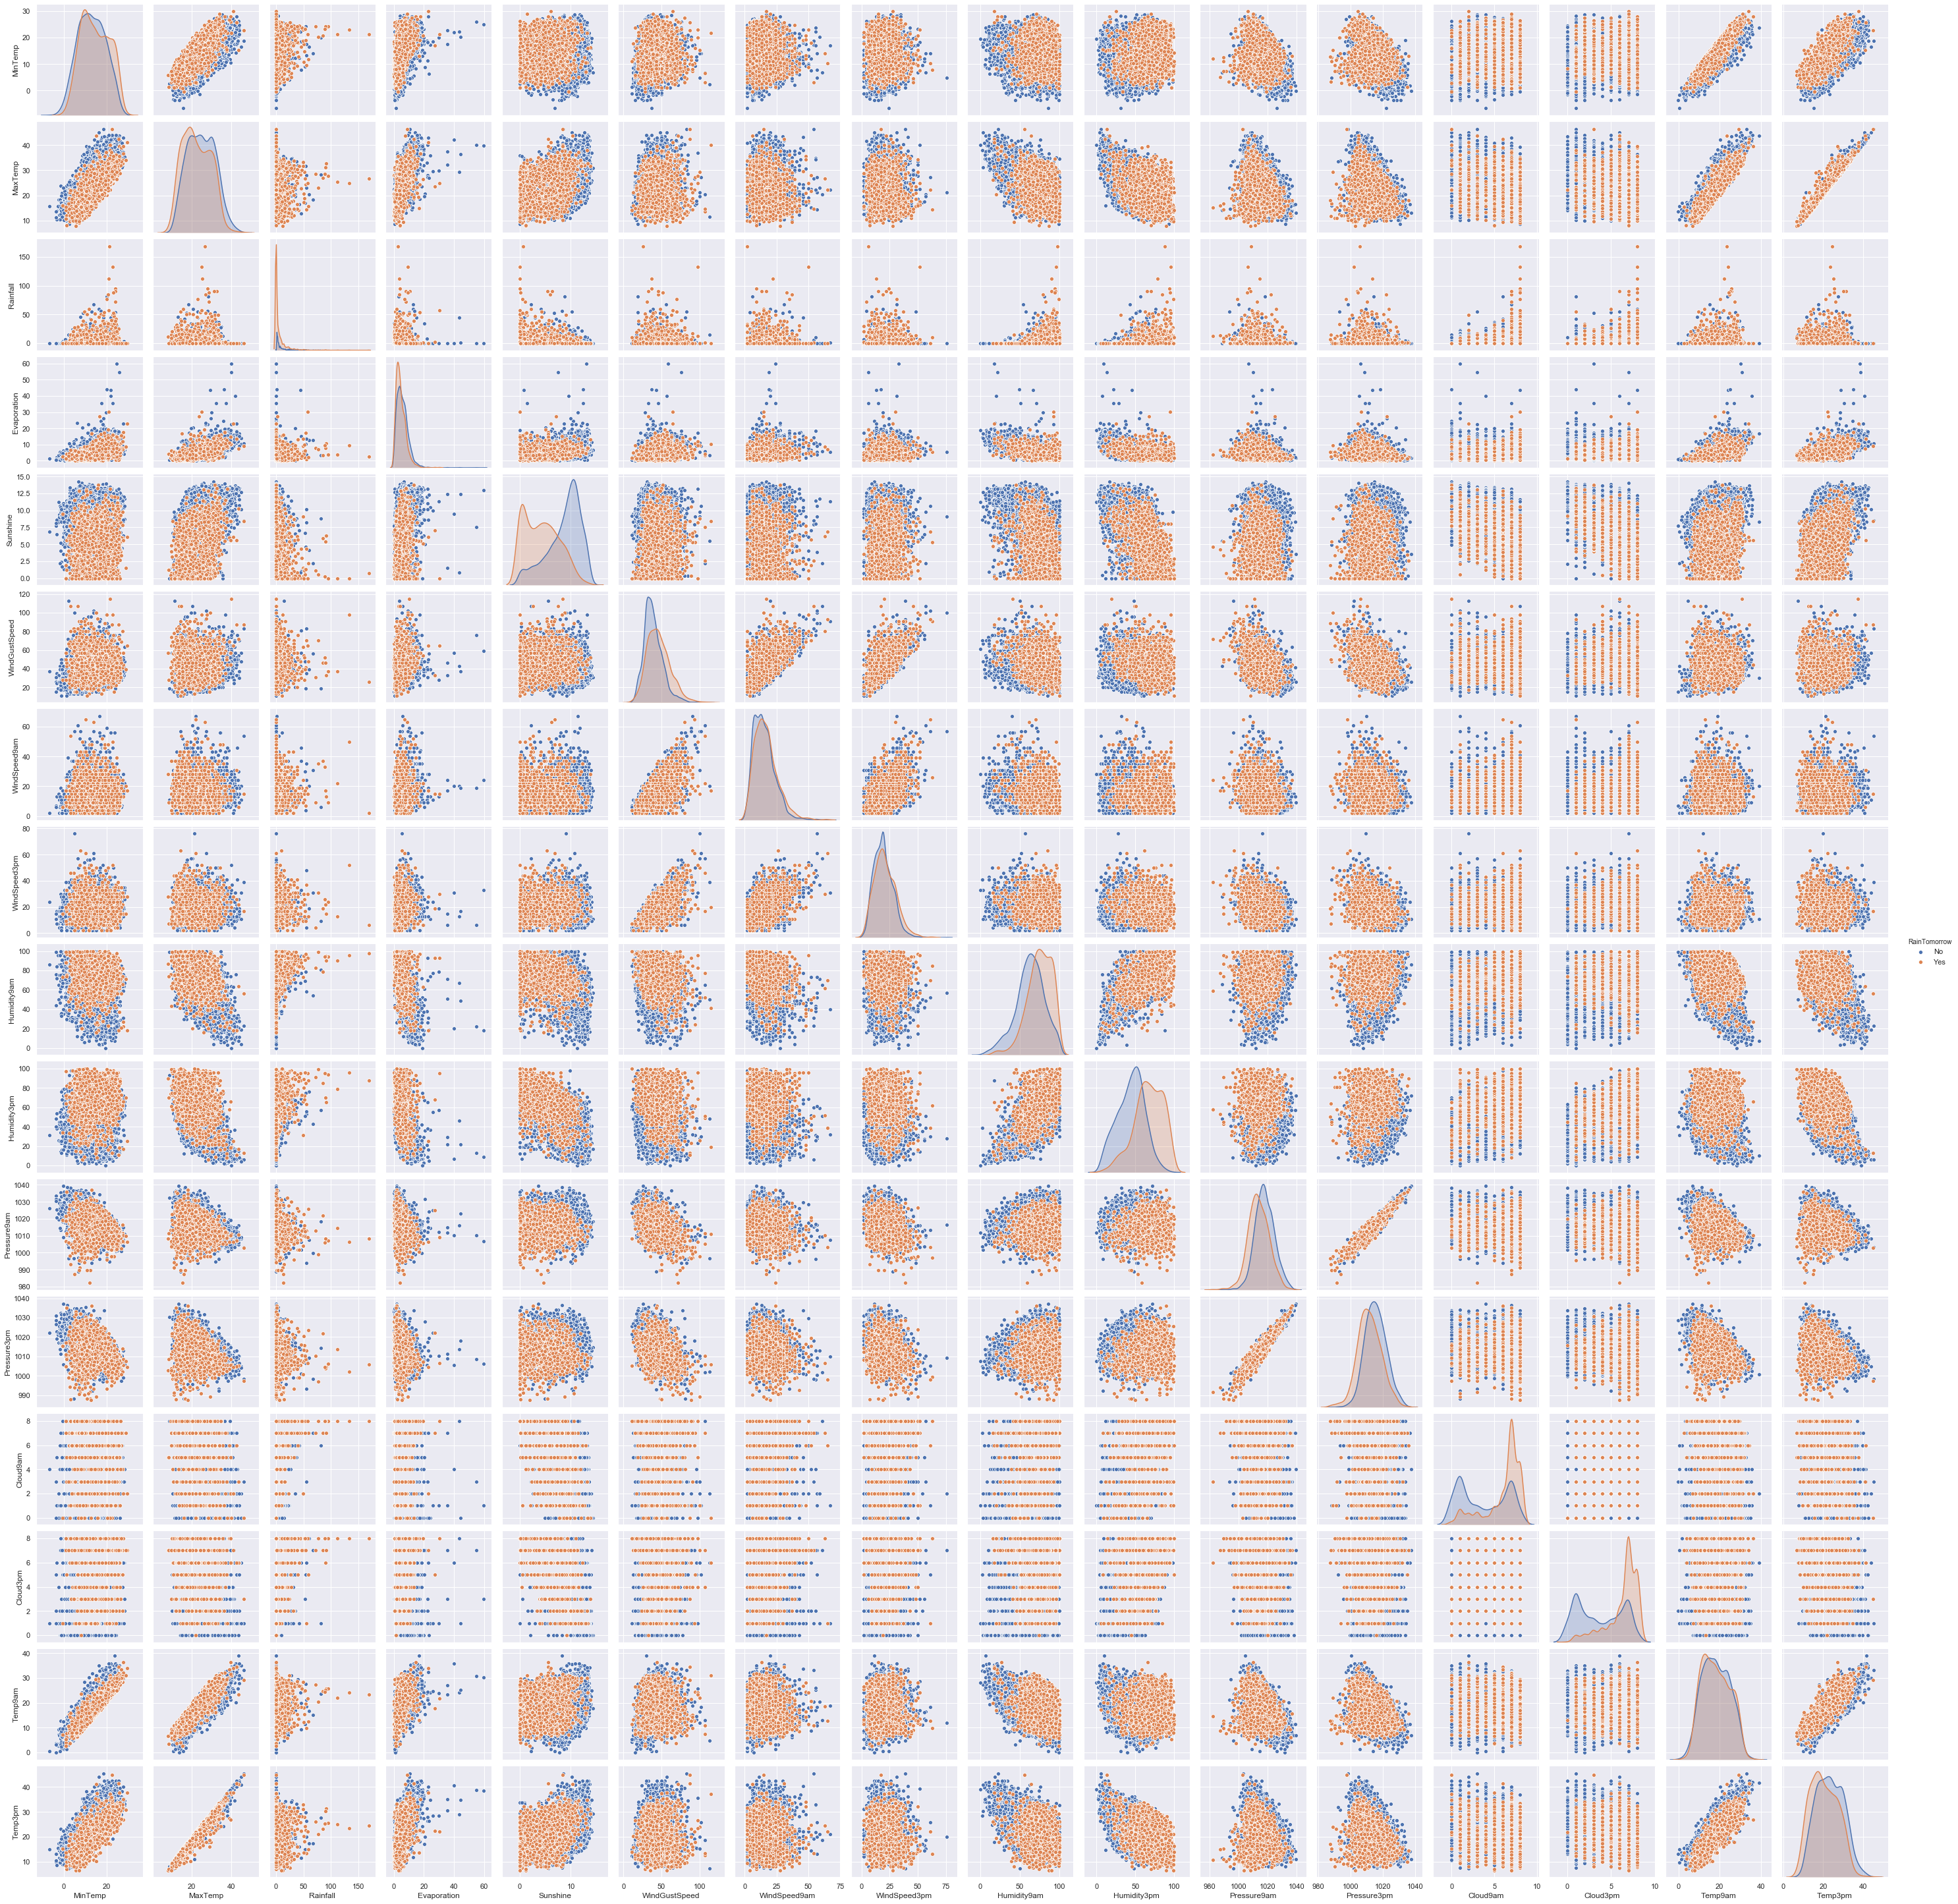

In [80]:
sns.pairplot(data.sample(frac = 0.1), hue = 'RainTomorrow')

Hay algunas que parecen *correlacionadas*. Tratamos de cuantificarlo.

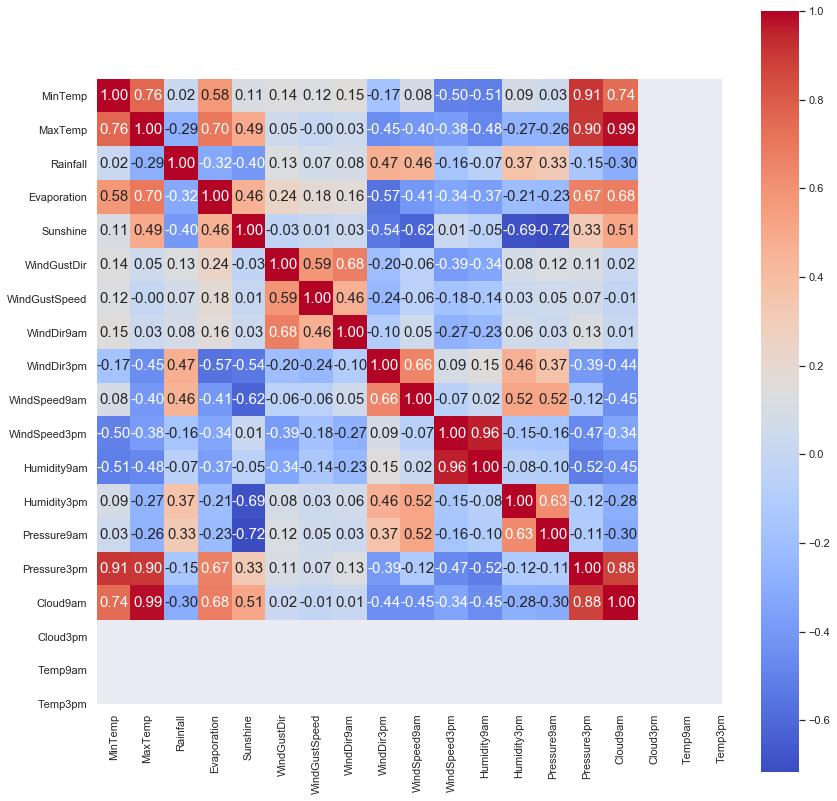

In [81]:
corr = data.drop(columns = ['RainTomorrow']).corr(method='spearman') # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.drop(columns = ['RainTomorrow']).columns, 
           yticklabels= data.drop(columns = ['RainTomorrow']).columns,
           cmap= 'coolwarm')

plt.show()

En base a la correlación, podemos descartar (o no) algunas variables. **Para pensar**, ¿por qué haríamos (o no) esto?

In [82]:
# data = data.drop(columns=['MinTemp','MaxTemp','WindSpeed9am','WindSpeed3pm'])
data = data.drop(columns=['MaxTemp','Pressure3pm'])

6. Llevar `RainTomorrow` a una variable númerica

In [83]:
di = {'Yes': 1, 'No': 0}
data['RainTomorrow'] = data['RainTomorrow'].map(di)
data.head(20)

MinTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed  \
5939     17.9       0.0         12.0      12.3         SSW           48.0   
5940     18.4       0.0         14.8      13.0           S           37.0   
5942     19.4       0.0         10.8      10.6         NNE           46.0   
5943     21.9       0.0         11.4      12.2         WNW           31.0   
5944     24.2       0.0         11.2       8.4         WNW           35.0   
5945     27.1       0.0         13.0       0.0           N           43.0   
5946     23.3       0.0          9.8      12.6         SSW           41.0   
5947     16.1       0.0         14.6      13.2          SE           37.0   
5948     19.0       0.0         12.0      12.3         ENE           48.0   
5949     19.7       0.0         11.0      12.7          NE           41.0   
5950     20.9       0.0         12.8      13.2           E           30.0   
5951     23.9       0.0         13.8      12.1         ENE           39.0   
5952     24.9       0.0         14.8      13.0         SSW           43.0   
5953     25.2       0.0         16.4      10.3          SW           44.0   
5954     21.6       0.0         17.4      13.1          SW           44.0   
5955     18.4       0.0         16.0      12.9           S           33.0   
5956     17.9       0.0         12.0      11.3          SE           61.0   
5957     21.4       0.0         14.8       6.9         NNE           43.0   
5958     23.3       4.8         12.0      10.9           W           59.0   
5959     25.4       0.0         13.6       3.7           N           46.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
5939        ENE         SW           6.0          20.0         20.0   
5940        SSE        SSE          19.0          19.0         30.0   
5942        NNE        NNW          30.0          15.0         42.0   
5943        WNW        WSW           6.0           6.0         37.0   
5944         NW        WNW          17.0          13.0         19.0   
5945          N        WNW           7.0          20.0         26.0   
5946          S        SSE          17.0          19.0         33.0   
5947         SE          S          15.0           6.0         25.0   
5948        ENE        WSW          30.0           9.0         46.0   
5949        NNE        WSW          15.0          17.0         61.0   
5950         SE        ENE          11.0           7.0         27.0   
5951         NE          N          24.0           9.0         40.0   
5952          N        NNW          17.0          11.0         25.0   
5953          W         SW          13.0          22.0         24.0   
5954          S          S          17.0          19.0         19.0   
5955          S         SW          17.0          15.0         25.0   
5956         NE         SE          22.0          17.0         46.0   
5957        ENE        NNE          26.0           9.0         34.0   
5958          N         NW          19.0          17.0         54.0   
5959         NW          N           9.0          28.0         46.0   

      Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
5939         13.0       1006.3       2.0       5.0     26.6     33.4   
5940          8.0       1012.9       1.0       1.0     20.3     27.0   
5942         22.0       1012.3       1.0       6.0     28.7     34.9   
5943         22.0       1012.7       1.0       5.0     29.1     35.6   
5944         15.0       1010.7       1.0       6.0     33.6     37.6   
5945         19.0       1007.7       8.0       8.0     30.7     34.3   
5946         15.0       1011.3       3.0       1.0     25.0     31.5   
5947          9.0       1013.3       1.0       1.0     20.7     32.8   
5948         28.0       1008.3       1.0       5.0     23.4     33.3   
5949         14.0       1007.9       1.0       5.0     24.0     33.6   
5950          9.0       1012.6       0.0       1.0     29.8     36.4   
5951         15.0       1013.6  

### Datos de entrenamiento y casos *benchmark*

Generamos casos base contra los cuales comparar nuestros resultados.

1. Elegir variables de entrenamiento (empezar con dos) y separar las etiquetas

In [84]:
columnas_entrenamiento = ['Humidity3pm', 'Rainfall']
X = data[columnas_entrenamiento]
y = data.RainTomorrow

2. Generar un modelo que diga siempre que NO va a llover y medir su exactitud.

In [85]:
#Todos Ceros
y_pred = np.zeros(y.shape)
accuracy_ceros = metrics.accuracy_score(y,y_pred)
print(accuracy_ceros)

0.7797412265154201


Y generar otro modelo que diga siempre que va a llover y medir su exactitud.

In [86]:
#Todos Unos
y_pred = np.ones(y.shape)
accuracy_unos = metrics.accuracy_score(y,y_pred)
print(accuracy_unos)

0.22025877348457992


## 2. Bagging

Separamos entre train y test

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

Recuerden que el objetivo de bagging es entrenar distintos modelos, donde cada uno vea distintas porciones del set de entrenamiento. Entonces, vamos a entrenar distintos árboles de decisión y mostrarles distintas porciones del set de datos. Lo vamos a hacer en un `for`.

1. Crear una lista vacía donde guardaremos los modelos entrenados y elegir cuántos modelos entrenar (Empezar por algún valor entre 5 y 10).

In [107]:
lista_de_modelos = []
N_modelos = 5

2. Entrenar cada modelo y guardar cada modelo entrenado en una lista. Para hacer el split, usar la función `train_test_split`. ¿Sobre qué conjunto van a hacer el split?¿Hay que fijar el `random_state`? 

In [108]:
for i in range(N_modelos):
    X_train_boostrap, _, y_train_boostrap, _ = train_test_split(X, y, test_size=0.5, stratify = y) #no tiene caso poner random_state por que lo que queremos es tener muestras aleatorias
    clf = DecisionTreeClassifier(max_depth = None) #Notar que lo dejamos overfitear
    clf.fit(X_train_boostrap, y_train_boostrap)
    lista_de_modelos.append(clf)

3. Evaluar el accuracy de cada modelo usando el conjunto de held_out

In [109]:
for idx, modelo in enumerate(lista_de_modelos):
    y_test_pred = modelo.predict(X_test)
    print('Accuracy Modelo ', idx, ' es ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Modelo  0  es  0.8442041829138603
Accuracy Modelo  1  es  0.8444995864350703
Accuracy Modelo  2  es  0.8438496986884083
Accuracy Modelo  3  es  0.8430225688290205
Accuracy Modelo  4  es  0.8453857969987002


Parecen estar un poco overfitteados, que era lo que esperábamos.

4. Evaluar el accuracy de todo el ensamble usando el conjunto de held_out. Vamos a hacerlo usando un promedio de las probabilidades que devuelven cada árbol. Si la probabilidad promedio es mayor a 0.5, clasificamos como positivo. Para ello:
    1. Inicializar un arreglo de probabilidades del tamaño de la cantidad de instancias del conjunto de test en ceros.

In [110]:
probs_test_pred = np.zeros(y_test.size)

B. Recorrer la lista de modelos y predecir las probabilidades. Mirar como es el `shape` de ese arreglo predicho. Elegir las probabilidades que correspondan a la clase positiva. Luego, sumarlas al vector que definieron antes.

In [111]:
for modelo in lista_de_modelos:
    probs_test_pred_modelo = modelo.predict_proba(X_test)
    print(probs_test_pred_modelo.shape)
    # Cuando esten seguros de lo que quieran sumar, descomentar la linea de abajo y completar
    probs_test_pred += probs_test_pred_modelo[:,1]
probs_test_pred
    

(16926, 2)
(16926, 2)
(16926, 2)
(16926, 2)
(16926, 2)


array([0.78780284, 0.58874823, 0.        , ..., 0.92736265, 2.9047619 ,
       0.1354994 ])

C. Dividir `probs_test_pred` por la cantidad de modelos

In [112]:
probs_test_pred = probs_test_pred/N_modelos
probs_test_pred

array([0.15756057, 0.11774965, 0.        , ..., 0.18547253, 0.58095238,
       0.02709988])

D. Crear las clases predichas (0s y 1s) a partir de comparar la probabilidad predicha con la probabilidad umbral (0.5).

In [113]:
y_test_pred = probs_test_pred>.5
y_test_pred = y_test_pred.astype(int)

Y evaluar la exactitud de todo el ensamble

In [114]:
print('Accuracy Ensambe ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Ensambe  0.8544251447477254


5. Explorar el `BagginClassfier` de scikit-learn y algunas de sus características. Usarlo para predecir sobre el train y test, y medir su desempeño.

In [115]:
from sklearn.ensemble import BaggingClassifier

In [117]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap = True, bootstrap_features=True, n_estimators = 100, n_jobs = -1)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.8601559730591989
0.8292567647406357


6. Si usaron dos features, pueden graficar las fronteras de decisión

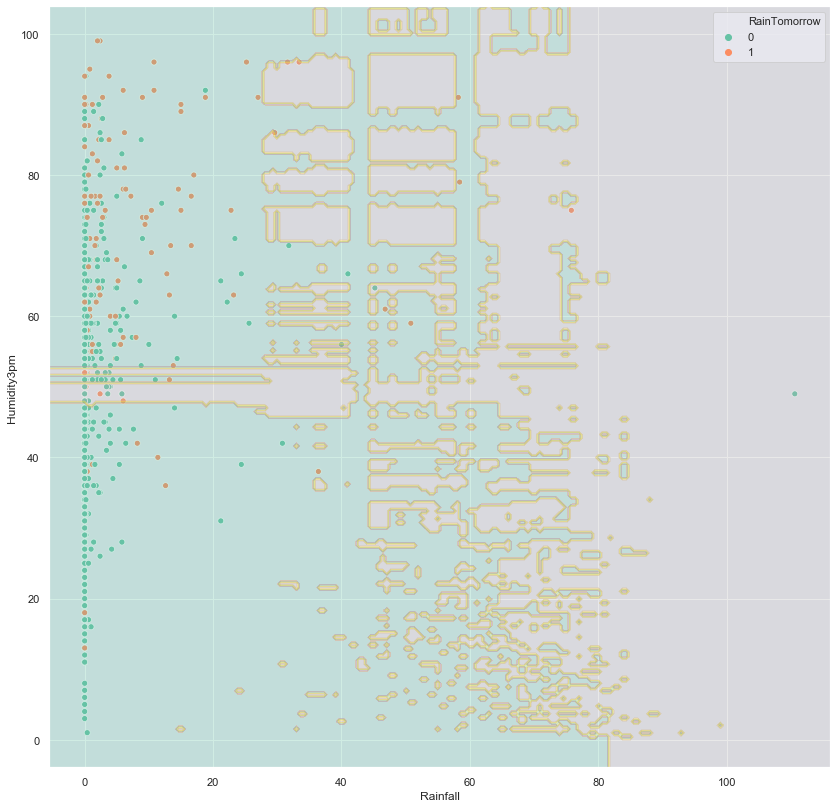

In [123]:
N = 20 #para no graficar todos los puntos y saturar el grafico

plt.figure(figsize = (14,14))

#Grafico Clasificador Sesgado
ax = sns.scatterplot(X_test[::N].Rainfall, X_test[::N].Humidity3pm, hue=y_test[::N], palette='Set2')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')

plt.show()

## 3. Random Forest

Random Forest, además de aplicar Bagging, también selecciona features al azar, de esa manera descorrelaciona aún más los distintos modelos de árbol creados.

1. Importar de scikit-learn el modelo `RandomForestClassifier`

In [133]:
from sklearn.ensemble import RandomForestClassifier

2. Investigar sus parámetros. En particular, `n_estimators`, `max_features` y `oob_score`. Luego, crear y entrenar un modelo en el conjunto de train.

In [134]:
clf = RandomForestClassifier(n_estimators=100, max_features='auto', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

3. Evaluar su desempeño en el conjunto de train y de test.

In [137]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train_pred, y_train))
print(metrics.accuracy_score(y_test_pred, y_test))

0.8663341267027903
0.8231123714994683


4. ¿Cuál es su `oob_score_`?¿Y que son `feature_importances_`?

In [138]:
clf.oob_score_

0.8212639894667545

In [139]:
clf.feature_importances_

array([0.59421431, 0.40578569])

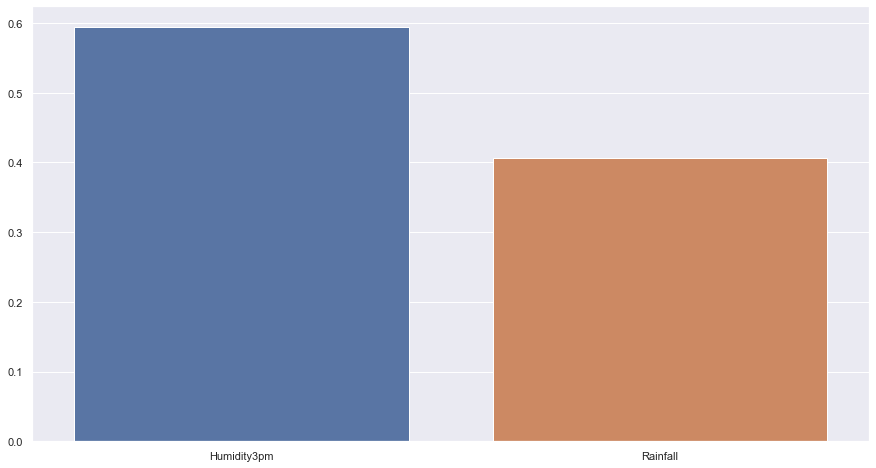

In [140]:
# CORRER ESTA CELDA UNA VEZ QUE HAYAN ESTUDIADO QUE ES OOB_SCORE Y FEATURE_IMPORTANCES
# https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710
importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

5. ¿Qué hay en la propiedad `estimators_`?

In [141]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, 

6. Elegir uno de los `estimators` y evaluar su desempeño sobre train y test.

In [142]:
clf_tree = clf.estimators_[30]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 787716372,
 'splitter': 'best'}

In [143]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.8506102192738138
0.8117097955807633


¿Está overfiteado?¿Por qué la accuracy sobre el conjunto de train no es 1?

7. Hacer y graficar la curva de validación/complejidad para un modelo Random Forest en función del número de estimadores. No usamos CV porque puede llevar bastante tiempo. Si quieren, lo pueden probar después. Además, obtener su oob_score para graficar en la curva de complejidad (No se preocupen por los mensajes de warning).

In [ ]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [1,2,3,4,5,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=COMPLETAR, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(COMPLETAR,COMPLETAR)
    
    y_train_pred = clf.predict(COMPLETAR)
    y_test_pred = clf.predict(COMPLETAR)
    
    train_accuracy.append(COMPLETAR)
    test_accuracy.append(COMPLETAR)
    oob_scores.append(clf.COMPLETAR)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, COMPLETAR, label = 'Train')
plt.plot(N_estimadores, COMPLETAR, label = 'Test')
plt.plot(N_estimadores, COMPLETAR, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
# plt.xlim(0,50)
plt.show()

8. Hacer y graficar la curva de aprendizaje para un modelo con 250 estimadores. Puede llevar bastante tiempo, no se preocupen.

In [ ]:
clf = RandomForestClassifier(n_estimators=250, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(COMPLETAR, COMPLETAR, COMPLETAR, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(COMPLETAR, COMPLETAR.mean(axis = COMPLETAR), color = 'r')
plt.plot(COMPLETAR, COMPLETAR.mean(axis = COMPLETAR), color = 'g')

plt.fill_between(COMPLETAR, COMPLETAR,
                     COMPLETAR, alpha=0.25,
                     color="r")
plt.fill_between(COMPLETAR, COMPLETAR,
                     COMPLETAR, alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.show()

9. Si usaron dos features, pueden graficar las fronteras de decisión.

In [ ]:
N = 20 #para no graficar todos los puntos y saturar el grafico
clf = RandomForestClassifier(n_estimators=250).fit(X_train, y_train)

#COMPLETAR

**Ejercicio**: elegir más features y volver a entrenar.

**Para pensar**: ¿qué otras métricas utilizarían para evaluar estos modelos, dadas las características particulares del problema? Comparar con los casos *benchmark* que hicieron.